In [1]:
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI

In [2]:
model = ChatOpenAI(model='gpt-5-nano')

In [3]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [4]:
# Creating State
class LLMWorkflow(TypedDict):
    question : str
    answer : str 

In [5]:
def question(state:LLMWorkflow) -> LLMWorkflow:
    question = state['question']
    prompt=f"Answet the following question {question}"
    state['answer']=model.invoke(prompt).content
    
    return state

In [6]:
graph = StateGraph(LLMWorkflow)

graph.add_node("question",question)

graph.add_edge(START,"question")
graph.add_edge("question",END)

workflow=graph.compile()


In [7]:
output=workflow.invoke({"question":"Who is Elon Musk?"})

In [8]:
print(output)

{'question': 'Who is Elon Musk?', 'answer': 'Elon Musk is a billionaire entrepreneur and tech magnate. Key points:\n\n- Born in 1971 in Pretoria, South Africa; later moved to the United States.\n- CEO and lead designer of SpaceX, aiming to reduce space travel costs and enable Mars colonization.\n- CEO and product architect of Tesla, Inc., driving electric vehicles, battery technology, and sustainable energy.\n- Founder of The Boring Company (tunnel projects) and co-founder of Neuralink (brain–computer interfaces).\n- Founder/owner of X (formerly Twitter), after acquiring the platform and rebranding it.\n- Co-founded PayPal (originally X.com) and was an early investor in OpenAI (left the OpenAI board in 2018).\n- Widely known as one of the richest people in the world and for his high-profile, sometimes controversial public presence.\n\nIf you want a shorter version: Elon Musk is a leading entrepreneur behind SpaceX and Tesla, with additional ventures in tunnels, brain tech, and social m

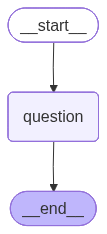

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())